In [1]:
from google.colab import drive #idk mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/PortraitClustering/archive.zip' -d '/content/drive/MyDrive/PortraitClustering/unzipped/' #upload zipped file to ur drive and then a folder to unzip the pics

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_201.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_202.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_203.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_204.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_205.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_206.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_207.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_208.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris-kustodiev_209.jpg  
  inflating: /content/drive/MyDrive/PortraitClustering/unzipped/Images/boris

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score
import numpy as np
#import stuff some is irrelevant idk which anymore

In [3]:
!pip show dlib #do u have dlib

Name: dlib
Version: 19.24.0
Summary: A toolkit for making real world machine learning and data analysis applications
Home-page: https://github.com/davisking/dlib
Author: Davis King
Author-email: davis@dlib.net
License: Boost Software License
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: 


In [4]:
import cv2 #import stuff 

In [5]:
import os

In [6]:
from sklearn.cluster import KMeans

In [7]:
import dlib #this one is most important. If the next line doesnt work go to conda and run: conda install -c conda -forge dlib

In [8]:
detector = dlib.get_frontal_face_detector() #creates an object thays used to detect faces in the images
predictor = dlib.shape_predictor(r"/content/drive/MyDrive/PortraitClustering/shape_predictor_68_face_landmarks (1).dat") #also have to download a file which ill send in gc and put it in the directory
#creates an object loads a pre-trained model.used to extract 68 facial landmarks from the detected faces.

In [9]:
data = []
path = '/content/drive/MyDrive/PortraitClustering/unzipped/Images/' #unzipped images folder
for filename in os.listdir(path): #iterates over the filenames 
    image = cv2.imread(path+ '/' + filename)  #reads the current image uses open cv btw. 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converts to grayscale
    detected = detector(gray, 1) #detects faces in the grayscale image, parameter = 1, detector will not change the size of the image,
    if len(detected) > 0: #are faces detected
        shape = predictor(gray, detected[0]) #extract facial landmarks, uses the gray image and detected part
        shape = shape.parts() #function to extract the facial landmarks as list.  dlib.point class is data structure that stores a pair of x and y coordinates,
        shape = np.array([[p.x, p.y] for p in shape]) #convert dlib point things to numpy array 
        data.append(shape.flatten()) # adds the flattened facial landmarks to data. 2D to 1D fr 
    else:
        data.append(np.zeros(136)) #no faces were detected

In [15]:

# apply k-means clustering
kmeans = KMeans(n_clusters=7, random_state=0).fit(data) #5 clusters and random_state = 0
clusters = kmeans.predict(data) #predicts the cluster assignments


In [19]:
# assign emotions to clusters
emotions = ['neutral', 'happy', 'sad', 'angry', 'surprised','disgust','fear'] #list of emotions..
for i in range(len(clusters)):
    print(f'filename{i+1} is classified as {emotions[clusters[i]]}') #i want to change to print(f'{filenames[i]} is classified as {emotions[clusters[i]]}')

Streaming output truncated to the last 5000 lines.
filename735 is classified as neutral
filename736 is classified as disgust
filename737 is classified as happy
filename738 is classified as neutral
filename739 is classified as disgust
filename740 is classified as neutral
filename741 is classified as happy
filename742 is classified as surprised
filename743 is classified as surprised
filename744 is classified as fear
filename745 is classified as disgust
filename746 is classified as neutral
filename747 is classified as disgust
filename748 is classified as angry
filename749 is classified as neutral
filename750 is classified as fear
filename751 is classified as disgust
filename752 is classified as neutral
filename753 is classified as angry
filename754 is classified as neutral
filename755 is classified as neutral
filename756 is classified as neutral
filename757 is classified as neutral
filename758 is classified as neutral
filename759 is classified as neutral
filename760 is classified as neutr

In [20]:

#PCA visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [21]:


# apply PCA to reduce the dimensionality of the data by 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)



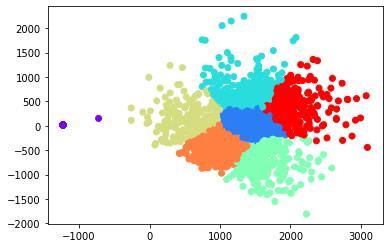

In [22]:

# plot the data points colored by cluster
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='rainbow')
plt.show()



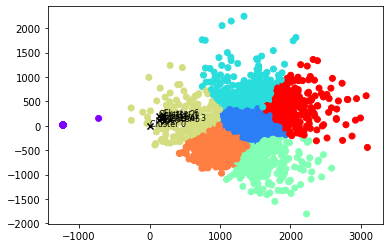

In [23]:
#  unique labels of the clusters
labels = np.unique(clusters)

#  coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points colored by cluster
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='rainbow')

# # Plot the cluster centers
# for label, center in zip(labels, cluster_centers):
#     plt.scatter(center[0], center[1], marker='x', color='black')
#     plt.text(center[0]-0.05, center[1]-0.05, f'Cluster {label}', fontsize=8)

# plt.show()

In [30]:

#create a csv file
import csv

# create a list of (filename, emotion) tuples
filenames = os.listdir(path)
image_emotions1 = [(filenames[i], emotions[clusters[i]]) for i in range(len(clusters))]

# write the list to a CSV file
with open('/content/drive/MyDrive/PortraitClustering/image_emotions1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'emotion'])
    writer.writerows(image_emotions1)

In [27]:
# #import csv
# def create_csv(clusters, filenames, images):
#     emotions = ['neutral', 'happy', 'sad', 'angry', 'surprised']
#     # Create a list of (filename, emotion) tuples
#     image_emotions = [(filenames[i], emotions[clusters[i]]) for i in range(len(clusters))]
#     # Write the list to a CSV file
#     with open('results.csv', 'w', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerow(['filename', 'emotion'])
#         writer.writerows(image_emotions)

# create_csv(clusters, filenames, images)

NameError: ignored